In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import casadi as ca
import os
import matplotlib.pyplot as plt
sys.path.insert(0, '../../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from pymola.backends.xml import modelica_xml_parser, hybrid_dae, sim_scipy

In [67]:
parser = modelica_xml_parser.XMLParser(
    modelica_xml_parser.SCHEMA_DIR, 'Modelica.xsd')
example_file = os.path.join(
    modelica_xml_parser.FILE_PATH, 'bouncing-ball.xml')
root = parser.read_file(example_file)
listener = modelica_xml_parser.ModelListener(verbose=False)
modelica_xml_parser.walk(root, listener)
model = listener.model[root][0]  # type: HybridDae

In [68]:
model


c     (  1):	c_0
dx    (  2):	[der(x), der(v)]
f_c   (  1):	(x<0)
f_m   (  0):	[]
f_x   (  2):	[(der(x)-v), (der(v)+g)]
m     (  0):	[]
p     (  2):	[g, c]
pre_m (  0):	[]
x     (  2):	[x, v]
y     (  0):	[]

In [69]:
model_ode = model.to_ode()
model_ode


c     (  1):	c_0
dx    (  2):	[der(x), der(v)]
f_c   (  1):	(x<0)
f_m   (  0):	[]
f_x_rhs(  2):	[v, (-g)]
g_rhs (  0):	0x1
m     (  0):	[]
p     (  2):	[g, c]
pre_m (  0):	[]
x     (  2):	[x, v]

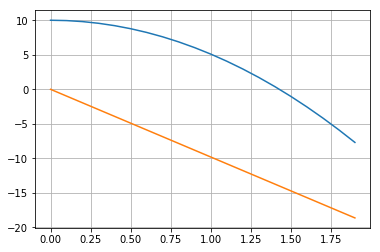

In [73]:
data = sim_scipy.sim(model_ode, {'tf': 2})
plt.plot(data['t'], data['x'])
plt.grid()